# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# Data Files

In [2]:
incident = "Data/DC_2019/NIBRS_INCIDENT.csv"
offense = "Data/DC_2019/NIBRS_OFFENSE.csv"
offense_type = "Data/DC_2019/NIBRS_OFFENSE_TYPE.csv"
offender = "Data/DC_2019/NIBRS_OFFENDER.csv"
victim = "Data/DC_2019/NIBRS_VICTIM.csv"
victim_type = "Data/DC_2019/NIBRS_VICTIM_TYPE.csv"
month = "Data/DC_2019/NIBRS_month.csv"
location = "Data/DC_2019/NIBRS_LOCATION_TYPE.csv"
circumstances_victim_correspondance = "Data/DC_2019/NIBRS_VICTIM_CIRCUMSTANCES.csv"
circumstances_list = "Data/DC_2019/NIBRS_CIRCUMSTANCES.csv"
bias_list = "Data/DC_2019/NIBRS_BIAS_LIST.csv"
bias_offense_id_correspondance = "Data/DC_2019/NIBRS_BIAS_MOTIVATION.csv"
offender_victim_relationship = "Data/DC_2019/NIBRS_VICTIM_OFFENDER_REL.csv"
relationships_list = "Data/DC_2019/NIBRS_RELATIONSHIP.csv"

# Building the original DataFrame

In [3]:
def build_data_frame():
    return (
pd.read_csv(incident)[["INCIDENT_ID","NIBRS_MONTH_ID","INCIDENT_HOUR"]]
.merge(pd.read_csv(month)
      [["NIBRS_MONTH_ID","MONTH_NUM"]],
      on="NIBRS_MONTH_ID", how="left") 
    #4105 rows after merge
    
.merge(pd.read_csv(offense)
    [["INCIDENT_ID","OFFENSE_ID","OFFENSE_TYPE_ID","LOCATION_ID"]], on="INCIDENT_ID", how="left") 
    #4510 rows(+405 rows) after merge. One incident may have several offenses
    
.merge(pd.read_csv(location)
    [["LOCATION_ID","LOCATION_NAME"]],
      on="LOCATION_ID", how="left") 
    #still 4510 rows afet merge
    
.merge(pd.read_csv(offense_type)
    [["OFFENSE_TYPE_ID","OFFENSE_NAME","CRIME_AGAINST","OFFENSE_CATEGORY_NAME"]], 
       on="OFFENSE_TYPE_ID", how="left")
    #still 4510 rows after merge
    
.merge(pd.read_csv(offender)
    [["INCIDENT_ID","OFFENDER_ID","SEX_CODE","AGE_ID","AGE_NUM","AGE_RANGE_LOW_NUM","AGE_RANGE_HIGH_NUM"]]
    .rename(columns=
               {
                   "SEX_CODE": "offender_gender",
                   "AGE_ID": "offender_age_id",
                   "AGE_NUM": "offender_age",
                   "AGE_RANGE_LOW_NUM":"offender_age_range_low",
                   "AGE_RANGE_HIGH_NUM": "offender_age_range_high"
               }), 
       on="INCIDENT_ID", how="left")
    #6305 rows (+1795 rows) after merge. One incident may have several offenders
    
.merge(pd.read_csv(victim)
    [["INCIDENT_ID","VICTIM_ID","VICTIM_TYPE_ID","SEX_CODE","AGE_ID","AGE_NUM","AGE_RANGE_LOW_NUM","AGE_RANGE_HIGH_NUM","RESIDENT_STATUS_CODE"]]
       .rename(columns=
               {
                   "SEX_CODE": "victim_gender",
                   "AGE_ID": "victim_age_id",
                   "AGE_NUM": "victim_age",
                   "AGE_RANGE_LOW_NUM": "victim_age_range_low",
                   "AGE_RANGE_HIGH_NUM": "victim_age_range_high",
                   "RESIDENT_STATUS_CODE": "victim_resident_code"
               }),
       on="INCIDENT_ID", how="left")
    #7674 rows (+1369 rows) after merge. One victime may have several offenders
    
.merge(pd.read_csv(victim_type)
    [["VICTIM_TYPE_ID","VICTIM_TYPE_NAME"]],
      on="VICTIM_TYPE_ID", how="left")
    #still 7674 rows after merge
    
.merge(pd.read_csv(circumstances_victim_correspondance)
    [["VICTIM_ID","CIRCUMSTANCES_ID"]],
      on="VICTIM_ID", how="left")
    #still 7674 rows after merge
    
.merge(pd.read_csv(circumstances_list)
    [["CIRCUMSTANCES_ID","CIRCUMSTANCES_NAME"]],
      on="CIRCUMSTANCES_ID", how="left")
    #still 7674 rows after merge
    
.merge(pd.read_csv(bias_offense_id_correspondance)
    [["OFFENSE_ID","BIAS_ID"]],
      on="OFFENSE_ID", how="left")
    #still 7674 rows after merge
    
.merge(pd.read_csv(bias_list)
    [["BIAS_ID","BIAS_CATEGORY","BIAS_DESC"]],
      on="BIAS_ID", how="left")
    #still 7674 rows after merge
    
.merge(pd.read_csv(offender_victim_relationship)
    [["VICTIM_ID","RELATIONSHIP_ID"]],
      on="VICTIM_ID", how="left")
    #15786 rows (+8112 rows) after merge. One victim may have several relationships (several offenders)

.merge(pd.read_csv(relationships_list)
    [["RELATIONSHIP_ID","RELATIONSHIP_NAME","RELATIONSHIP_TYPE_ID"]],
      on="RELATIONSHIP_ID", how="left")
    #still 15786 rows after merge
    #15786 rows × 34 columns
.drop_duplicates()
)
df = build_data_frame()

In [4]:
df

,INCIDENT_ID,NIBRS_MONTH_ID,INCIDENT_HOUR,MONTH_NUM,OFFENSE_ID,OFFENSE_TYPE_ID,LOCATION_ID,LOCATION_NAME,OFFENSE_NAME,CRIME_AGAINST,...,victim_resident_code,VICTIM_TYPE_NAME,CIRCUMSTANCES_ID,CIRCUMSTANCES_NAME,BIAS_ID,BIAS_CATEGORY,BIAS_DESC,RELATIONSHIP_ID,RELATIONSHIP_NAME,RELATIONSHIP_TYPE_ID
0,121549353,8180938,20.0,6,147151350,18,1,Air/Bus/Train Terminal,Purse-snatching,Property,...,N,Individual,NaN,NaN,21,None/Unknown,None (no bias),NaN,NaN,NaN
1,121551726,8211586,19.0,10,147151354,40,1,Air/Bus/Train Terminal,Robbery,Property,...,R,Individual,NaN,NaN,21,None/Unknown,None (no bias),24.0,Victim Was Stranger,3.0
6,121551726,8211586,19.0,10,147151354,40,1,Air/Bus/Train Terminal,Robbery,Property,...,R,Individual,NaN,NaN,21,None/Unknown,None (no bias),24.0,Victim Was Stranger,3.0
11,121551726,8211586,19.0,10,147151354,40,1,Air/Bus/Train Terminal,Robbery,Property,...,R,Individual,NaN,NaN,21,None/Unknown,None (no bias),24.0,Victim Was Stranger,3.0
16,121551726,8211586,19.0,10,147151354,40,1,Air/Bus/Train Terminal,Robbery,Property,...,R,Individual,NaN,NaN,21,None/Unknown,None (no bias),24.0,Victim Was Stranger,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15781,123059907,8226910,NaN,12,148906547,5,18,Parking/Drop Lot/Garage,Destruction/Damage/Vandalism of Property,Property,...,R,Individual,NaN,NaN,21,None/Unknown,None (no bias),NaN,NaN,NaN
15782,123059907,8226910,NaN,12,148906547,5,18,Parking/Drop Lot/Garage,Destruction/Damage/Vandalism of Property,Property,...,R,Individual,NaN,NaN,21,None/Unknown,None (no bias),NaN,NaN,NaN
15783,123059907,8226910,NaN,12,148906546,14,18,Parking/Drop Lot/Garage,Theft From Motor Vehicle,Property,...,R,Individual,NaN,NaN,21,None/Unknown,None (no bias),NaN,NaN,NaN
15784,123059907,8226910,NaN,12,148906546,14,18,Parking/Drop Lot/Garage,Theft From Motor Vehicle,Property,...,R,Individual,NaN,NaN,21,None/Unknown,None (no bias),NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8006 entries, 0 to 15785
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_ID              8006 non-null   int64  
 1   NIBRS_MONTH_ID           8006 non-null   int64  
 2   INCIDENT_HOUR            6627 non-null   float64
 3   MONTH_NUM                8006 non-null   int64  
 4   OFFENSE_ID               8006 non-null   int64  
 5   OFFENSE_TYPE_ID          8006 non-null   int64  
 6   LOCATION_ID              8006 non-null   int64  
 7   LOCATION_NAME            8006 non-null   object 
 8   OFFENSE_NAME             8006 non-null   object 
 9   CRIME_AGAINST            8006 non-null   object 
 10  OFFENSE_CATEGORY_NAME    8006 non-null   object 
 11  OFFENDER_ID              8006 non-null   int64  
 12  offender_gender          7350 non-null   object 
 13  offender_age_id          7350 non-null   float64
 14  offender_age           

<font color=blue size=5><center><b>Data Analysis and Modelling using the FBI Crime Data</b></center></font>
<font color=blue size=1><center><i>(for Washington DC)</i></center></font>  

Goal: "create a model to predict the type of offense when given location, hour, month and gender and age of the victim"

<font color=blue size=5><center><b>Presentation Plan</b></center></font>  

- Analysis part

<center>Data Used</center>

<center>Offenses (monthly and daily times)</center>

<center>Victims (gender and age)</center>

<center>Offenders (gender and age)</center>

- Modelling part

<font color=blue size=5><center><b>Terminology</b></center></font>  

- Offense: any typy of law-breaking act, from larceny to murder

- Victim: victim of an offense

- Offender: person who committed the offense
        (According to the definition from the data: the offenders must be aware of, and consent to, the commission of the crime(s))

<font color=blue size=5><center><b>Data Used</b></center></font>  

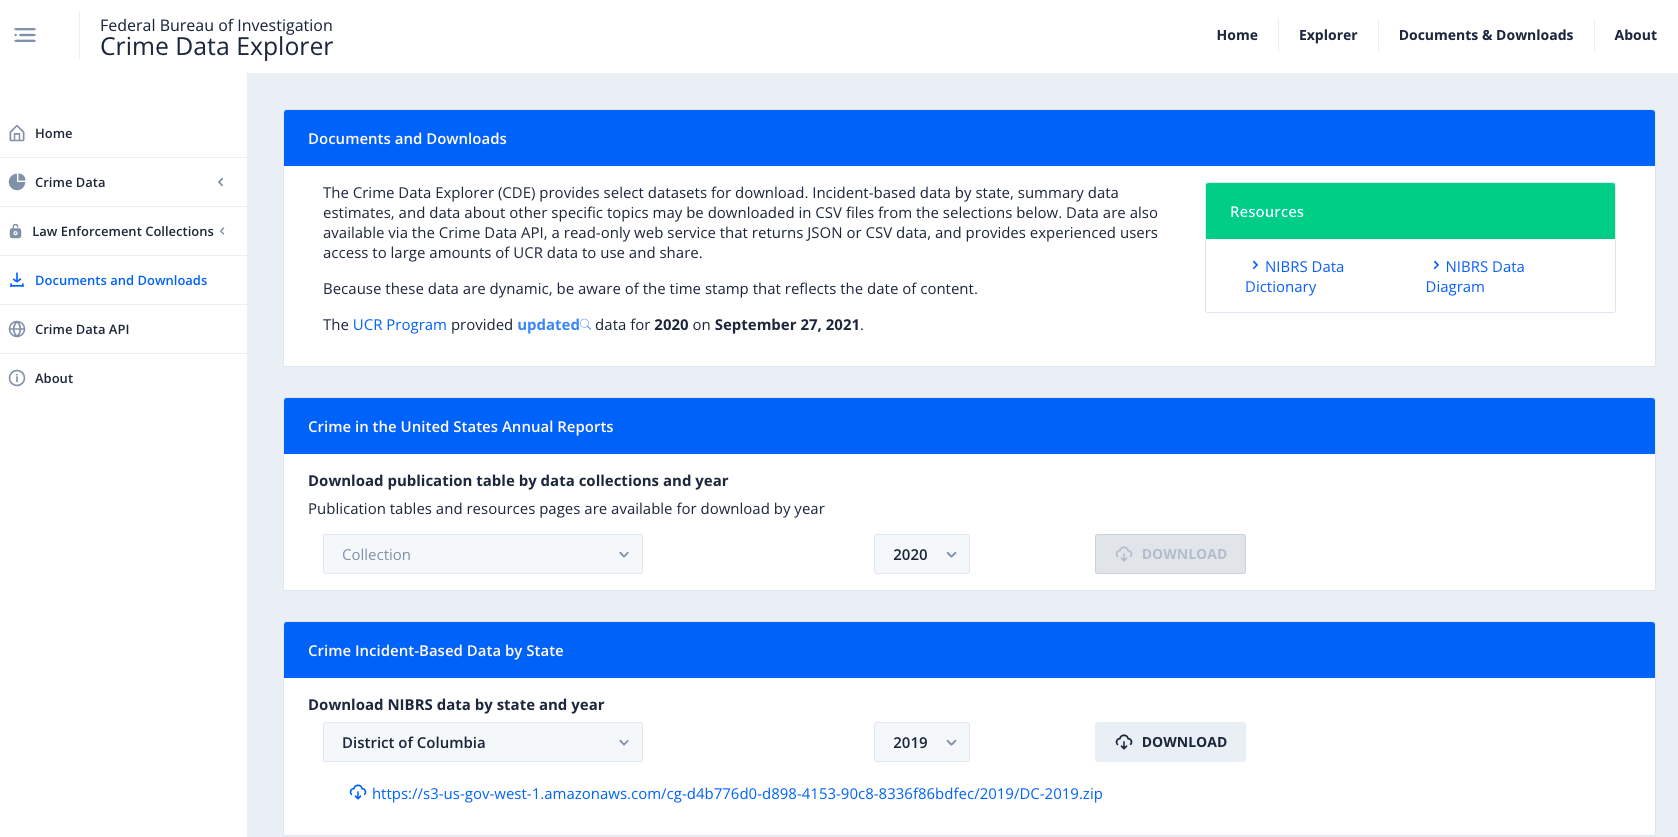


Available here: https://crime-data-explorer.fr.cloud.gov/pages/downloads


In [6]:
display(Image(filename='DataBaseWebsitePic.png'))
print("\nAvailable here: https://crime-data-explorer.fr.cloud.gov/pages/downloads")

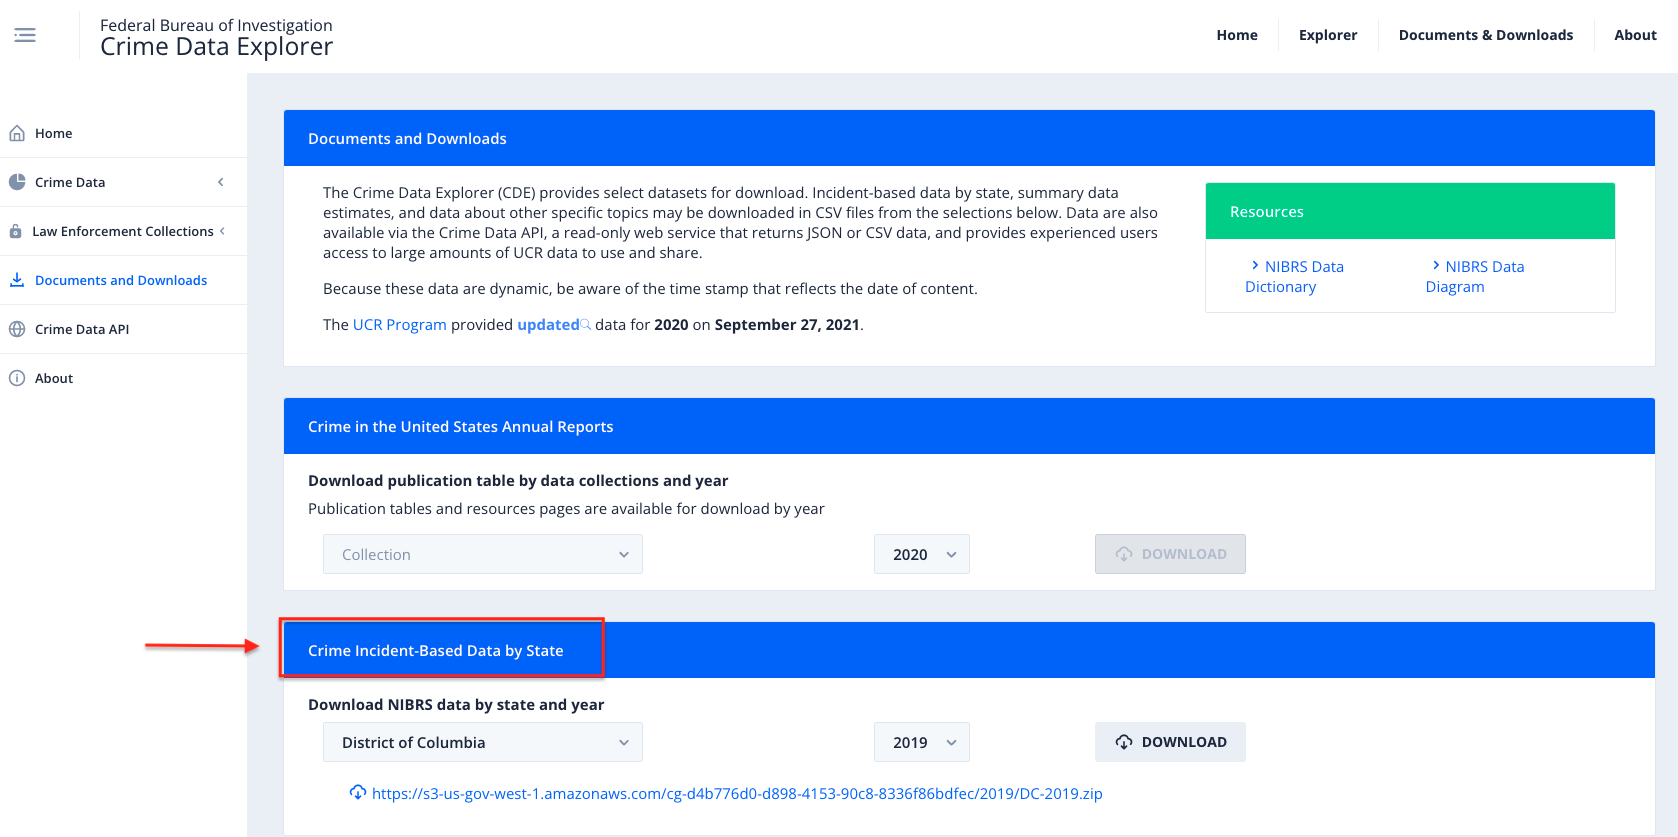


Available here: https://crime-data-explorer.fr.cloud.gov/pages/downloads


In [7]:
display(Image(filename='DataBaseWebsitePic_marked.png'))
print("\nAvailable here: https://crime-data-explorer.fr.cloud.gov/pages/downloads")

# Exploratory visualizations

## Incidents times

### Monthly distribution

<font color=blue size=5><center><b>Offenses (monthly and daily times)</b></center></font>  

<font color=blue size=5><center><b>Offenses (types)</b></center></font>  

In [8]:
(df[["OFFENSE_CATEGORY_NAME","OFFENSE_NAME"]]
 .drop_duplicates()
 .groupby(["OFFENSE_CATEGORY_NAME","OFFENSE_NAME"])
 .count()
 .sort_values(by="OFFENSE_CATEGORY_NAME")
# .INCIDENT_ID
# .rename(columns={"OFFENSE_CATEGORY_NAME":"CATEGORY","OFFENSE_NAME":"NAME"})
# .duplicated(subset="CATEGORY")
).iloc[:,:]

Empty DataFrame
Columns: []
Index: [(Arson, Arson), (Assault Offenses, Aggravated Assault), (Assault Offenses, Intimidation), (Assault Offenses, Simple Assault), (Burglary/Breaking & Entering, Burglary/Breaking & Entering), (Counterfeiting/Forgery, Counterfeiting/Forgery), (Destruction/Damage/Vandalism of Property, Destruction/Damage/Vandalism of Property), (Drug/Narcotic Offenses, Drug Equipment Violations), (Drug/Narcotic Offenses, Drug/Narcotic Violations), (Fraud Offenses, Credit Card/Automated Teller Machine Fraud), (Fraud Offenses, False Pretenses/Swindle/Confidence Game), (Fraud Offenses, Impersonation), (Kidnapping/Abduction, Kidnapping/Abduction), (Larceny/Theft Offenses, Theft of Motor Vehicle Parts or Accessories), (Larceny/Theft Offenses, Theft From Motor Vehicle), (Larceny/Theft Offenses, Theft From Coin-Operated Machine or Device), (Larceny/Theft Offenses, All Other Larceny), (Larceny/Theft Offenses, Purse-snatching), (Larceny/Theft Offenses, Pocket-picking), (Larceny/Theft Offenses, Theft From Building), (Motor Vehicle Theft, Motor Vehicle Theft), (Pornography/Obscene Material, Pornography/Obscene Material), (Robbery, Robbery), (Sex Offenses, Fondling), (Sex Offenses, Rape), (Stolen Property Offenses, Stolen Property Offenses), (Weapon Law Violations, Weapon Law Violations)]

<font color=blue size=5><b><center>Offenses (time)</center></b></font>

<font color=blue size=5><b>Offenses, monthly distribution</b></font>  

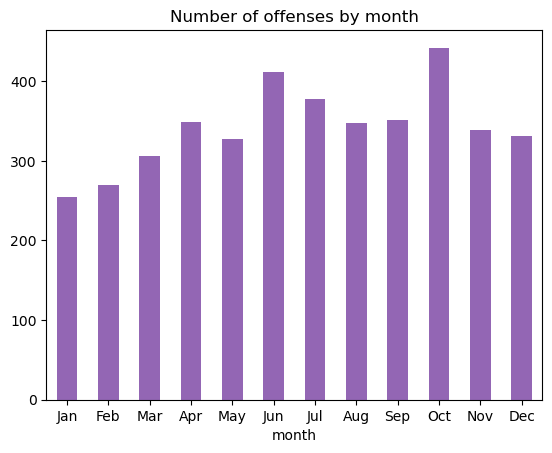

In [9]:
(df[["MONTH_NUM","INCIDENT_ID"]]
 .drop_duplicates()
 .replace({"MONTH_NUM":{
     1:"Jan",
     2:"Feb",
     3:"Mar",
     4:"Apr",
     5:"May",
     6:"Jun",
     7:"Jul",
     8:"Aug",
     9:"Sep",
     10:"Oct",
     11:"Nov",
     12:"Dec"
 }})
 .groupby("MONTH_NUM")
 .count()
 .reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
).plot(kind="bar",
       title="Number of offenses by month",
       xlabel="month",
       color="indigo",
      alpha=0.6,
      rot=360,
      legend=False)
plt.show()

### Hourly distribution

<font color=blue size=5><b>Offenses, daily distribution</b></font>  

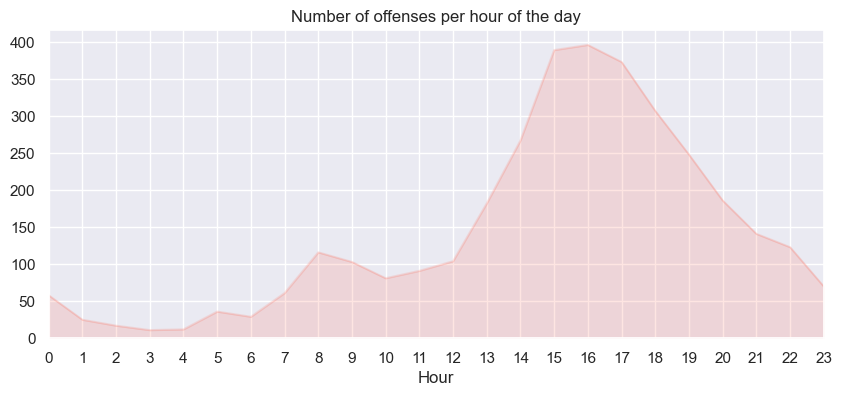

In [10]:
all_incidents_times_df = (
    df[["INCIDENT_HOUR","INCIDENT_ID"]]
    .drop_duplicates()
    .groupby("INCIDENT_HOUR")
    .count()
    .sort_values(by="INCIDENT_HOUR", ascending=False)
)
sns.set_theme(style="darkgrid")
all_incidents_times_df.plot(
    figsize = (10,4),
    title="Number of offenses per hour of the day",
    xlabel="Hour",
#    ylabel="Number of Incidents",
    legend=False,
    kind="area", 
    xticks=np.arange(24),
    xlim=(0,23),
    alpha=0.2, 
    color="salmon"
    )
plt.show()

### Times per offense

In [11]:
(df[["OFFENSE_NAME","INCIDENT_ID","INCIDENT_HOUR"]]
      [(df["INCIDENT_HOUR"]==8)]
      .drop_duplicates()
      .groupby(["OFFENSE_NAME","INCIDENT_HOUR"])
      .count()
      .unstack()
      .INCIDENT_ID
      .sort_values(by=8.0,ascending=False))

INCIDENT_HOUR,8.0
OFFENSE_NAME,
Simple Assault,42
Destruction/Damage/Vandalism of Property,26
All Other Larceny,11
Purse-snatching,9
Robbery,6
Fondling,5
Theft From Motor Vehicle,5
Weapon Law Violations,4
Drug/Narcotic Violations,3


In [12]:
 (df[["OFFENSE_NAME","INCIDENT_ID","INCIDENT_HOUR"]]
      [(df["INCIDENT_HOUR"]==15)]
      .drop_duplicates()
      .groupby(["OFFENSE_NAME","INCIDENT_HOUR"])
      .count()
      .unstack()
      .INCIDENT_ID
      .sort_values(by=15.0,ascending=False))

INCIDENT_HOUR,15.0
OFFENSE_NAME,
Drug/Narcotic Violations,151
Simple Assault,132
Robbery,36
Destruction/Damage/Vandalism of Property,25
Purse-snatching,22
Drug Equipment Violations,16
All Other Larceny,13
Weapon Law Violations,13
Aggravated Assault,7


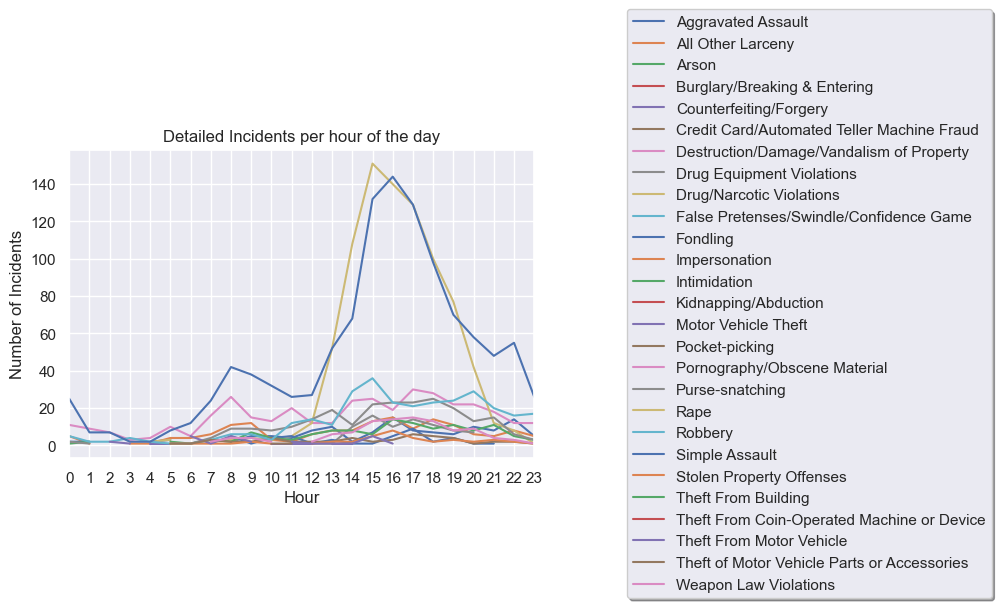

In [13]:
times_per_incident_df = (
    df[["INCIDENT_HOUR","INCIDENT_ID","OFFENSE_NAME"]]
    .drop_duplicates()
    .groupby(["INCIDENT_HOUR","OFFENSE_NAME"])
    .count()
    .unstack()
    .INCIDENT_ID
    .sort_values(by="INCIDENT_HOUR", ascending=False)
)
times_per_incident_df

times_per_incident_df.plot(
    figsize = (6,4),
    title="Detailed Incidents per hour of the day",
    xlabel="Hour",
    ylabel="Number of Incidents",
    legend=False,
    xticks=np.arange(24),
    xlim=(0,23)
).legend(loc="right", shadow=True, bbox_to_anchor=(2,0.5))
plt.show()

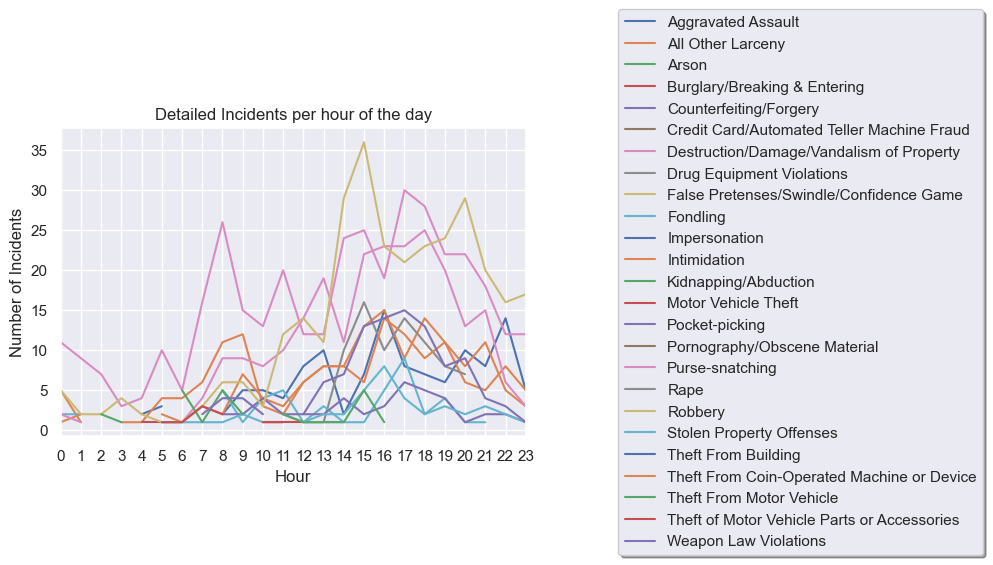

In [14]:
times_per_incident_df = (
    df[["INCIDENT_HOUR","INCIDENT_ID","OFFENSE_NAME"]]
    .drop_duplicates()
    .groupby(["INCIDENT_HOUR","OFFENSE_NAME"])
    .count()
    .unstack()
    .INCIDENT_ID
    .drop(columns=["Drug/Narcotic Violations","Simple Assault"], axis=1)
)
times_per_incident_df

times_per_incident_df.plot(
    figsize = (6,4),
    title="Detailed Incidents per hour of the day",
    xlabel="Hour",
    ylabel="Number of Incidents",
    legend=False,
    xticks=np.arange(24),
    xlim=(0,23)
).legend(loc="right", shadow=True, bbox_to_anchor=(2,0.5))
plt.show()

## Victims types, gender and age

### Victim types

In [15]:
victims_df = df[["VICTIM_ID","victim_gender","VICTIM_TYPE_NAME","victim_age_id","victim_age","OFFENSE_NAME","OFFENSE_CATEGORY_NAME"]]


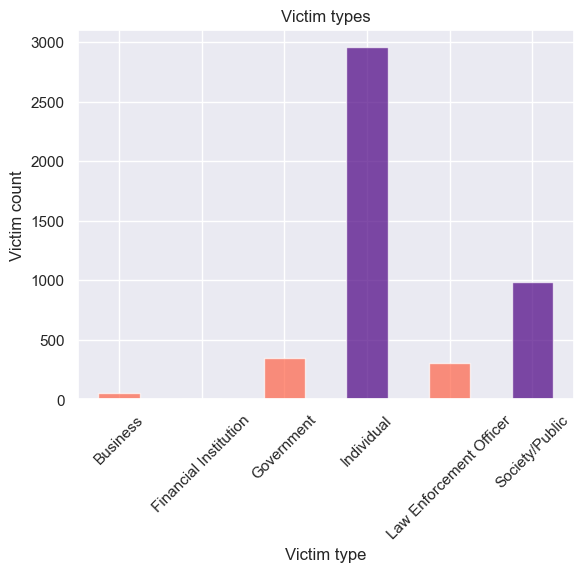

In [16]:
(victims_df[["VICTIM_TYPE_NAME","VICTIM_ID"]]
 .drop_duplicates()
 .groupby("VICTIM_TYPE_NAME")
 .count()
 .VICTIM_ID
).plot(
    kind="bar", 
    rot=45,
    title="Victim types",
    xlabel="Victim type",
    ylabel="Victim count",
    alpha=0.7,
    color=("tomato","indigo"),
    legend=False,)
plt.show()

### Victim gender (Individuals)

In [17]:
(victims_df[["victim_gender","VICTIM_TYPE_NAME","VICTIM_ID"]]
 [(victims_df["VICTIM_TYPE_NAME"]=="Individual")&(victims_df["victim_gender"]!="U")]
 .drop(columns=["VICTIM_TYPE_NAME"])
 .drop_duplicates()
 .groupby("victim_gender")
 .count()
)

,VICTIM_ID
victim_gender,
F,1322
M,1631


<font color=blue size=5><center><b>Victims (gender and age)</b></center></font>

<font color=blue size=5><b>Victims gender</b></font>

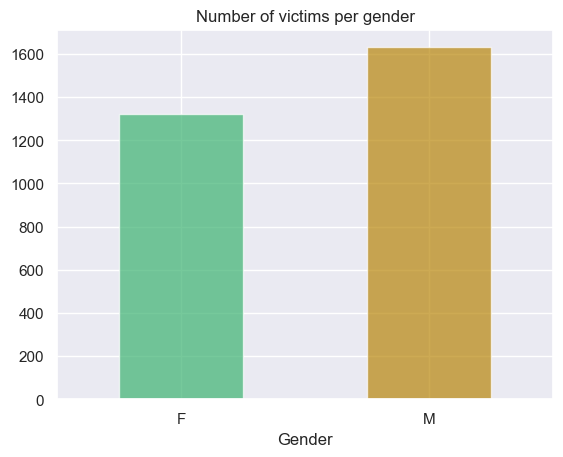

In [18]:
(victims_df[["victim_gender","VICTIM_TYPE_NAME","VICTIM_ID"]]
 [(victims_df["VICTIM_TYPE_NAME"]=="Individual")&(victims_df["victim_gender"]!="U")]
 .drop(columns=["VICTIM_TYPE_NAME"])
 .drop_duplicates()
 .groupby("victim_gender")
 .count()
 .VICTIM_ID
).plot(
    kind="bar",
    title="Number of victims per gender",
    xlabel="Gender",
#    ylabel="Number of victims",
    alpha=0.7,
    rot=360,
    color=("mediumseagreen", "darkgoldenrod"),
    legend=False)
plt.show()

### Victim age (Individuals)

In [19]:
(victims_df[["victim_age_id","VICTIM_TYPE_NAME","VICTIM_ID","victim_age"]]
 [(victims_df["VICTIM_TYPE_NAME"]=="Individual")&(victims_df["victim_age_id"]==5)]
 .drop_duplicates()
)[["victim_age"]].describe()
#mode: 15

,victim_age
count,2951.000000
mean,35.104710
std,15.896537
min,1.000000
25%,22.000000
50%,33.000000
75%,48.000000
max,88.000000


<font color=blue size=5><b>Victims age</b></font>

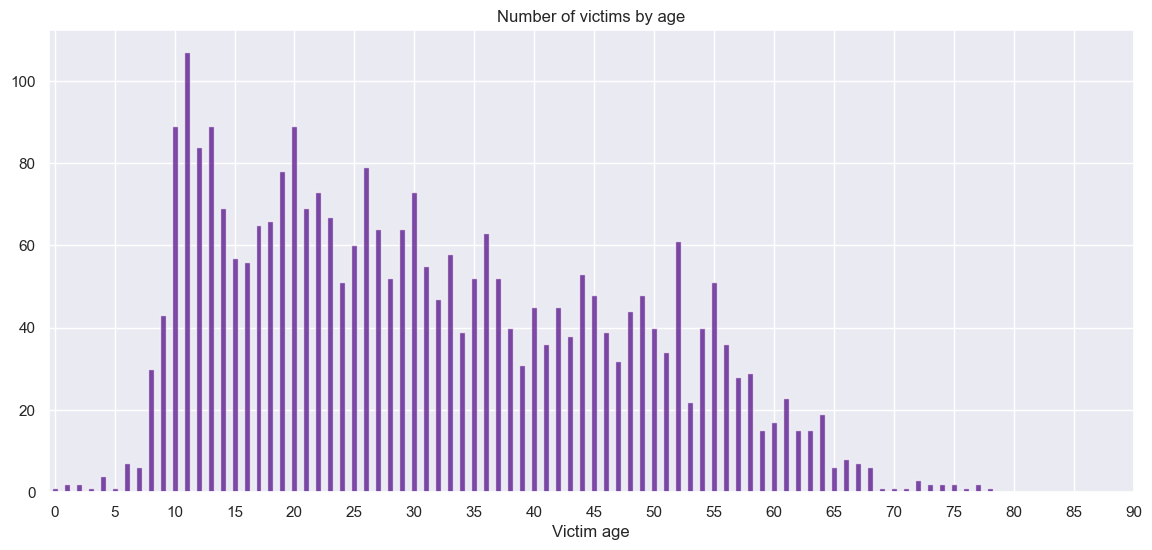

In [20]:
(victims_df[["victim_age","victim_age_id","VICTIM_TYPE_NAME","VICTIM_ID"]]
 [(victims_df["VICTIM_TYPE_NAME"]=="Individual")&(victims_df["victim_age_id"]==5)]
 .drop_duplicates()
 .drop(columns=["VICTIM_TYPE_NAME","victim_age_id"])
 .assign(victim_age=victims_df.victim_age.fillna(0).astype(int))
 .groupby("victim_age")
 .count()
).plot(
    kind="bar",
    figsize=(14,6), 
    title="Number of victims by age",
    xlabel="Victim age",
    alpha=0.7,
    color="indigo",
    xticks=np.arange(0, 91,5),
    rot=360,
    legend=False,)
plt.show()

## Offenders gender and age

In [21]:
#Offenders DataFrame
offenders_df = df[["OFFENSE_NAME","OFFENSE_CATEGORY_NAME","OFFENDER_ID","offender_gender","offender_age_id","offender_age","offender_age_range_low","offender_age_range_high"]]
offenders_df

,OFFENSE_NAME,OFFENSE_CATEGORY_NAME,OFFENDER_ID,offender_gender,offender_age_id,offender_age,offender_age_range_low,offender_age_range_high
0,Purse-snatching,Larceny/Theft Offenses,138159407,M,5.0,14.0,14.0,0.0
1,Robbery,Robbery,138171621,M,5.0,13.0,13.0,0.0
6,Robbery,Robbery,138171624,M,5.0,15.0,15.0,0.0
11,Robbery,Robbery,138171622,M,5.0,15.0,15.0,0.0
16,Robbery,Robbery,138171623,M,5.0,15.0,15.0,0.0
...,...,...,...,...,...,...,...,...
15781,Destruction/Damage/Vandalism of Property,Destruction/Damage/Vandalism of Property,140000419,M,5.0,38.0,38.0,0.0
15782,Destruction/Damage/Vandalism of Property,Destruction/Damage/Vandalism of Property,140000419,M,5.0,38.0,38.0,0.0
15783,Theft From Motor Vehicle,Larceny/Theft Offenses,140000419,M,5.0,38.0,38.0,0.0
15784,Theft From Motor Vehicle,Larceny/Theft Offenses,140000419,M,5.0,38.0,38.0,0.0


### General gender distribution

<font color=blue size=5><b><center>Offenders (gender and age)</center></b></font>

<font color=blue size=5><b>Offenders gender</b></font>

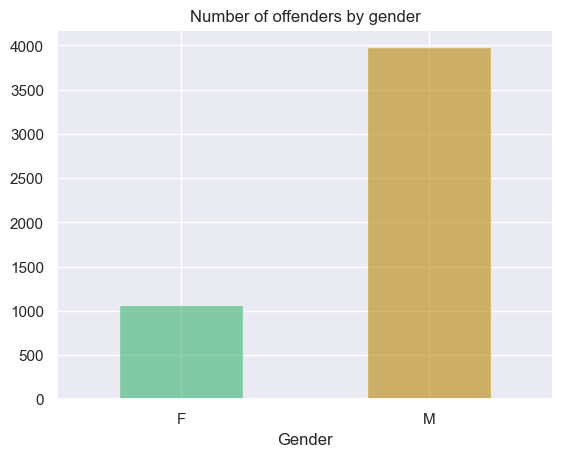

In [22]:
(
    offenders_df[["offender_gender","OFFENDER_ID"]][(offenders_df["offender_gender"]!="U")]
    .drop_duplicates()
    .groupby("offender_gender")
    .count()
    .OFFENDER_ID
).plot(
    kind="bar",
    title="Number of offenders by gender",
    xlabel="Gender",
#    ylabel="Count of offenders",
    rot=360, 
    color=("mediumseagreen", "darkgoldenrod"), 
    alpha=0.6)
plt.show()

### Offenders age

### Victim gender per type of offense (Individuals)

In [23]:
(victims_df[["victim_gender","VICTIM_TYPE_NAME","OFFENSE_NAME","VICTIM_ID","OFFENSE_CATEGORY_NAME"]]
 [(victims_df["VICTIM_TYPE_NAME"]=="Individual")&(victims_df["victim_gender"]!="U")]
 .drop(columns=["VICTIM_TYPE_NAME"])
 .drop_duplicates()
 .groupby(["OFFENSE_CATEGORY_NAME","OFFENSE_NAME","victim_gender"])
 .count()
 .unstack()
 .VICTIM_ID
)

victim_gender                                                                             F  \
OFFENSE_CATEGORY_NAME                    OFFENSE_NAME                                         
Assault Offenses                         Aggravated Assault                            57.0   
                                         Intimidation                                  71.0   
                                         Simple Assault                               568.0   
Counterfeiting/Forgery                   Counterfeiting/Forgery                         1.0   
Destruction/Damage/Vandalism of Property Destruction/Damage/Vandalism of Property     193.0   
Drug/Narcotic Offenses                   Drug Equipment Violations                      1.0   
                                         Drug/Narcotic Violations                       6.0   
Fraud Offenses                           Credit Card/Automated Teller Machine Fraud     3.0   
                                         False Pretenses/Swindle/Confidence Game        NaN   
Kidnapping/Abduction                     Kidnapping/Abduction                           2.0   
Larceny/Theft Offenses                   All Other Larceny                            110.0   
                                         Pocket-picking                                32.0   
                                         Purse-snatching                              143.0   
                                         Theft From Building                            NaN   
                                         Theft From Motor Vehicle                     127.0   
                                         Theft of Motor Vehicle Parts or Accessories   26.0   
Motor Vehicle Theft                      Motor Vehicle Theft                           14.0   
Robbery                                  Robbery                                      102.0   
Sex Offenses                             Fondling                                      56.0   
                                         Rape                                           3.0   
Stolen Property Offenses                 Stolen Property Offenses                      13.0   
Weapon Law Violations                    Weapon Law Violations                         11.0   

victim_gender                                                                             M  
OFFENSE_CATEGORY_NAME                    OFFENSE_NAME                                        
Assault Offenses                         Aggravated Assault                           100.0  
                                         Intimidation                                  70.0  
                                         Simple Assault                               565.0  
Counterfeiting/Forgery                   Counterfeiting/Forgery                         NaN  
Destruction/Damage/Vandalism of Property Destruction/Damage/Vandalism of Property     224.0  
Drug/Narcotic Offenses                   Drug Equipment Violations                      3.0  
                                         Drug/Narcotic Violations                       7.0  
Fraud Offenses                           Credit Card/Automated Teller Machine Fraud     2.0  
                                         False Pretenses/Swindle/Confidence Game        2.0  
Kidnapping/Abduction                     Kidnapping/Abduction                           6.0  
Larceny/Theft Offenses                   All Other Larceny                            237.0  
                                         Pocket-picking                                29.0  
                                         Purse-snatching                              127.0  
                                         Theft From Building                            2.0  
                                         Theft From Motor Vehicle                     106.0  
                                         Theft of Motor Vehicle Parts or Accessories   25.0  
Motor Vehicle Theft        

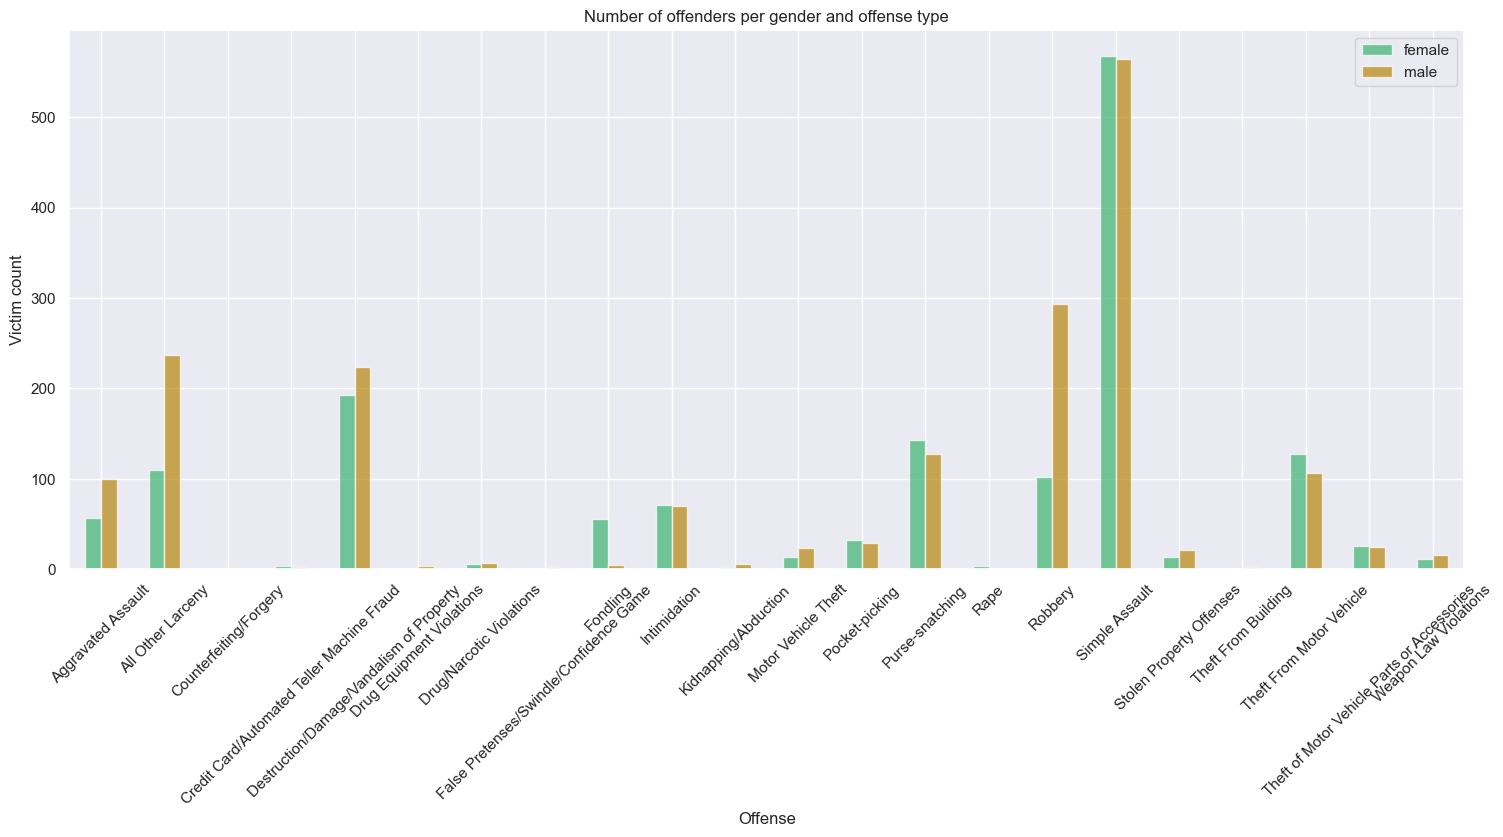

In [24]:
(victims_df[["victim_gender","VICTIM_TYPE_NAME","OFFENSE_NAME","VICTIM_ID"]]
 [(victims_df["VICTIM_TYPE_NAME"]=="Individual")&(victims_df["victim_gender"]!="U")]
 .drop(columns=["VICTIM_TYPE_NAME"])
 .drop_duplicates()
 .groupby(["OFFENSE_NAME","victim_gender"])
 .count()
 .unstack()
 .VICTIM_ID
).plot(
  figsize=(18,7),
  kind="bar",
  title="Number of offenders per gender and offense type",
  xlabel="Offense",
  ylabel="Victim count",
  alpha=0.7,
  rot=45,
  color=("mediumseagreen", "darkgoldenrod")).legend(["female","male"])
plt.show()

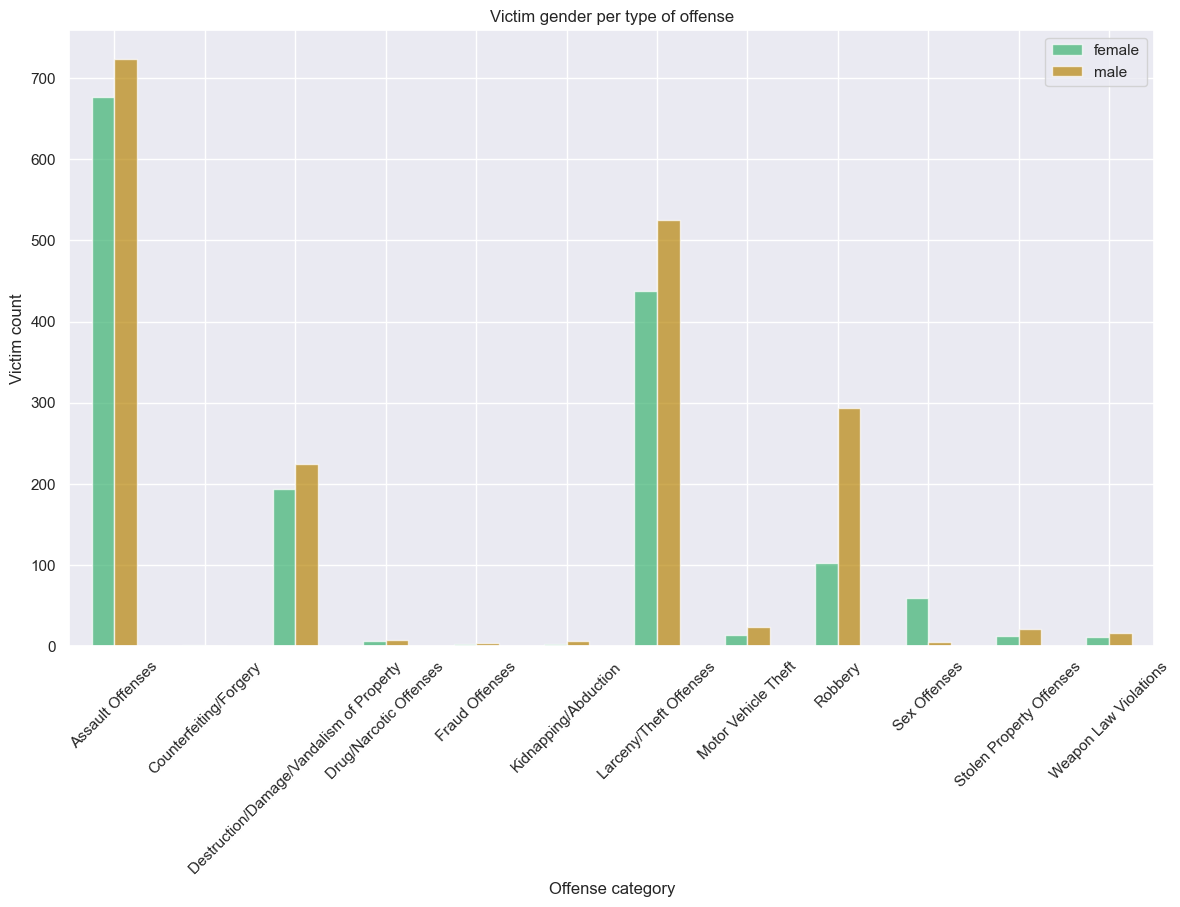

In [25]:
(victims_df[["victim_gender","VICTIM_TYPE_NAME","OFFENSE_CATEGORY_NAME","VICTIM_ID"]]
 [(victims_df["VICTIM_TYPE_NAME"]=="Individual")&(victims_df["victim_gender"]!="U")]
 .drop(columns=["VICTIM_TYPE_NAME"])
 .drop_duplicates()
 .groupby(["OFFENSE_CATEGORY_NAME","victim_gender"])
 .count()
 .unstack()
 .VICTIM_ID
).plot(
  figsize=(14,8),
  kind="bar",
  title="Victim gender per type of offense",
  xlabel="Offense category",
  ylabel="Victim count",
  alpha=0.7,
  rot=45,
  color=("mediumseagreen", "darkgoldenrod")).legend(["female","male"])
plt.show()

### Type of offense per gender

In [26]:
gender_distribution = (
    offenders_df[["OFFENSE_CATEGORY_NAME","OFFENSE_NAME","offender_gender","OFFENDER_ID"]][(offenders_df["offender_gender"]!="U")]
    .drop_duplicates()
    .groupby(["OFFENSE_CATEGORY_NAME","OFFENSE_NAME","offender_gender"])
    .count()
    .unstack()
    .OFFENDER_ID
)
gender_distribution
gender_distribution["women_percent"] = round((gender_distribution["F"]/(gender_distribution["F"]+gender_distribution["M"]))*100,2)
gender_distribution["total"] = gender_distribution["F"]+gender_distribution["M"]
gender_distribution.sort_values(by="women_percent")

offender_gender                                                                          F  \
OFFENSE_CATEGORY_NAME                    OFFENSE_NAME                                        
Sex Offenses                             Fondling                                      1.0   
Larceny/Theft Offenses                   Theft From Motor Vehicle                      1.0   
                                         Purse-snatching                              27.0   
Destruction/Damage/Vandalism of Property Destruction/Damage/Vandalism of Property     45.0   
Drug/Narcotic Offenses                   Drug Equipment Violations                    11.0   
                                         Drug/Narcotic Violations                    118.0   
Robbery                                  Robbery                                     153.0   
Weapon Law Violations                    Weapon Law Violations                        23.0   
Fraud Offenses                           Credit Card/Automated Teller Machine Fraud    1.0   
Larceny/Theft Offenses                   All Other Larceny                            36.0   
                                         Pocket-picking                               14.0   
Assault Offenses                         Intimidation                                 45.0   
                                         Aggravated Assault                           52.0   
Stolen Property Offenses                 Stolen Property Offenses                     20.0   
Assault Offenses                         Simple Assault                              610.0   
Arson                                    Arson                                         NaN   
Burglary/Breaking & Entering             Burglary/Breaking & Entering                  NaN   
Counterfeiting/Forgery                   Counterfeiting/Forgery                        NaN   
Fraud Offenses                           False Pretenses/Swindle/Confidence Game       NaN   
                                         Impersonation                                 NaN   
Kidnapping/Abduction                     Kidnapping/Abduction                          NaN   
Larceny/Theft Offenses                   Theft From Coin-Operated Machine or Device    NaN   
Motor Vehicle Theft                      Motor Vehicle Theft                           NaN   
Pornography/Obscene Material             Pornography/Obscene Material                  NaN   
Sex Offenses                             Rape                                          NaN   

offender_gender                                                                           M  \
OFFENSE_CATEGORY_NAME                    OFFENSE_NAME                                         
Sex Offenses                             Fondling                                      61.0   
Larceny/Theft Offenses                   Theft From Motor Vehicle                      20.0   
                                         Purse-snatching                              372.0   
Destruction/Damage/Vandalism of Property Destruction/Damage/Vandalism of Property     359.0   
Drug/Narcotic Offenses                   Drug Equipment Violations                     79.0   
                                         Drug/Narcotic Violations                     761.0   
Robbery                                  Robbery                                      818.0   
Weapon Law Violations                    Weapon Law Violations                        105.0   
Fraud Offenses                           Credit Card/Automated Teller Machine Fraud     4.0   
Larceny/Theft Offenses                   All Other Larceny                            142.0   
                                         Pocket-picking                                50.0   
Assault Offenses                         Intimidation                                 137.0   
                                         Aggravated Assault                           150.0   
Stolen Property Offenses            

- Offenses per gender

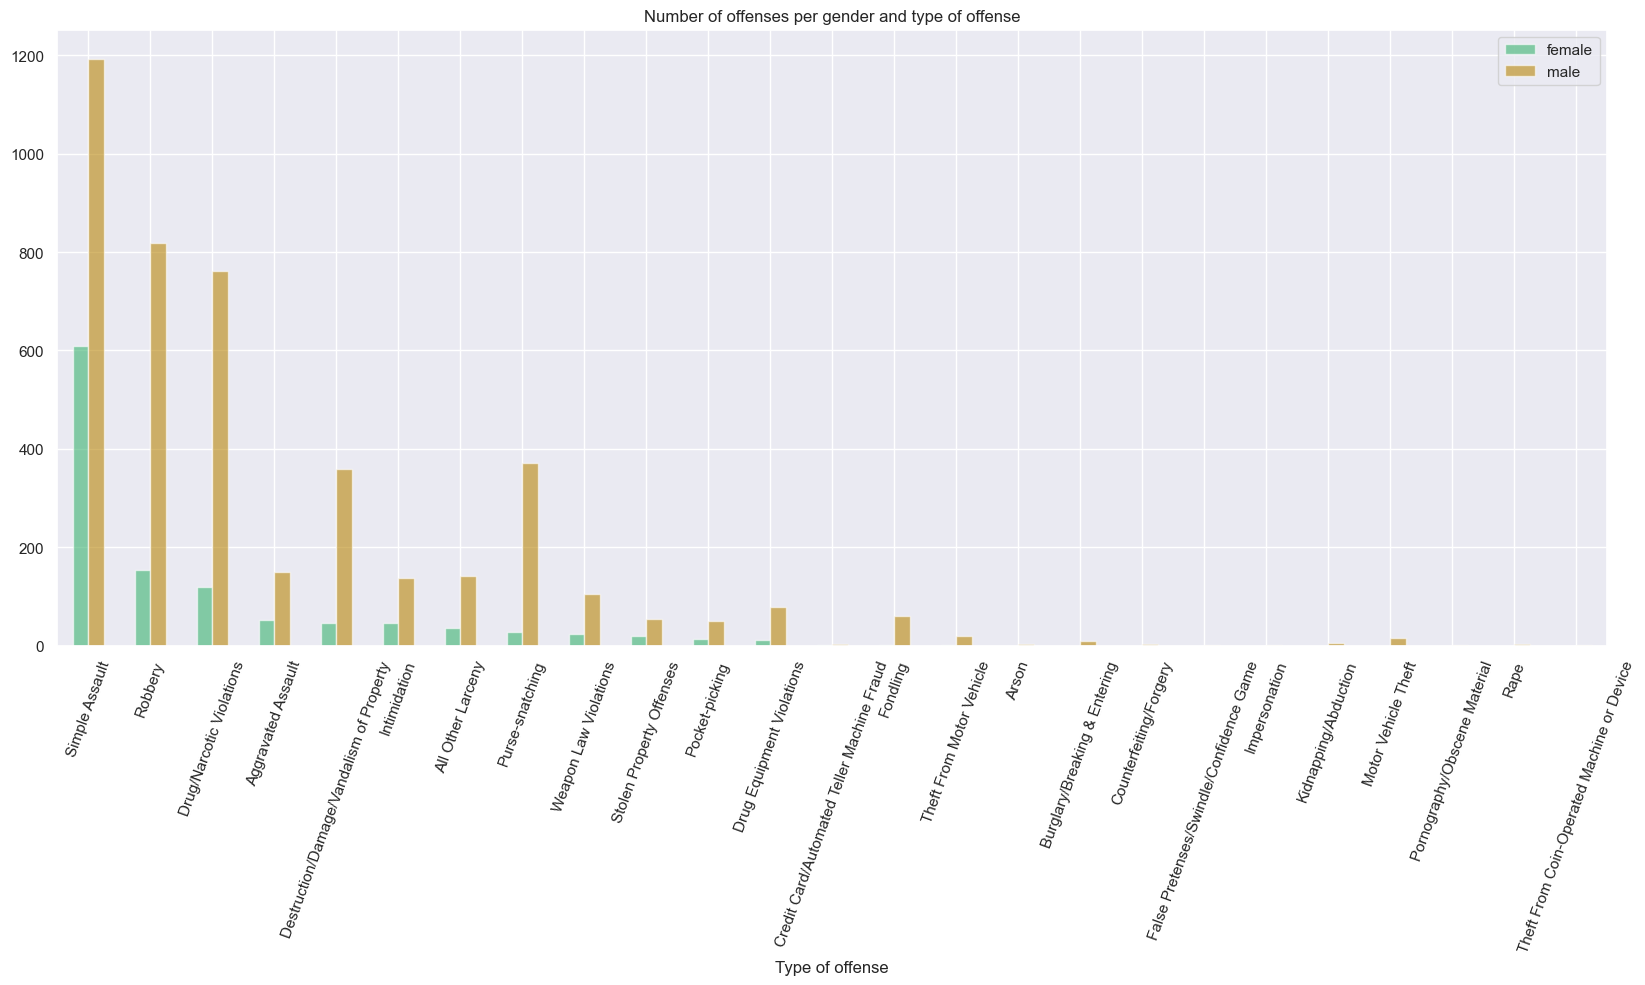

In [27]:
(
    offenders_df[["OFFENSE_NAME","offender_gender","OFFENDER_ID"]][(offenders_df["offender_gender"]!="U")]
    .drop_duplicates()
    .groupby(["OFFENSE_NAME","offender_gender"])
    .count()
    .unstack()
    .OFFENDER_ID
    .sort_values(by="F", ascending=False)
).plot(
    figsize=(20,8),
    kind="bar",
    title="Number of offenses per gender and type of offense",
    xlabel="Type of offense",
    rot=70,
    legend=False,
    color=("mediumseagreen", "darkgoldenrod"), 
    alpha=0.6,).legend(["female","male"])
plt.show()

<font color=blue size=5><b>Offenders age</b></font>

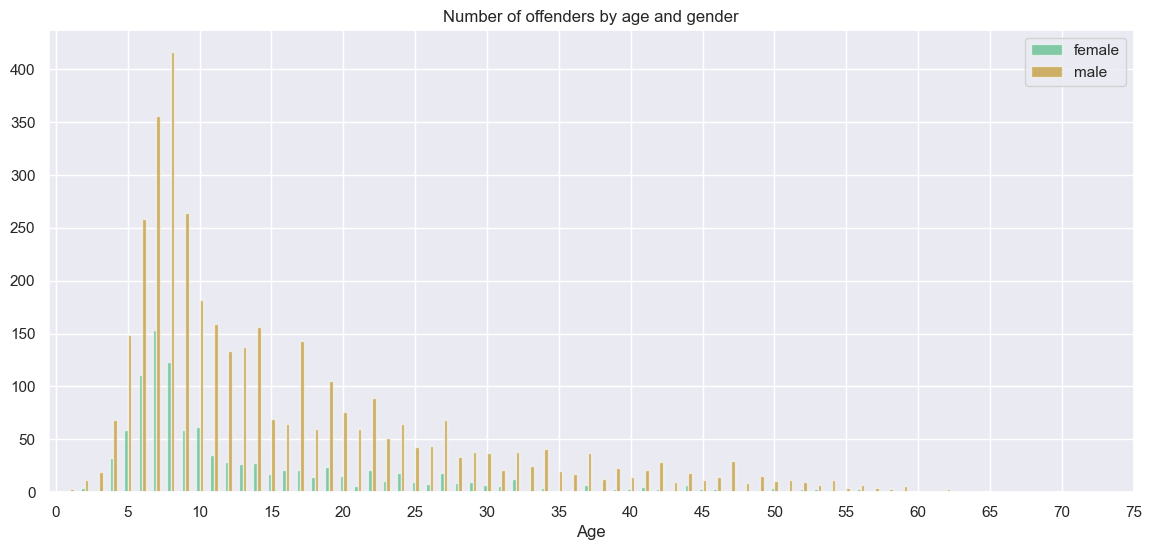

In [28]:
(
    offenders_df[["offender_age","offender_gender","OFFENDER_ID"]]
    [(offenders_df["offender_age_id"]==5)&(offenders_df["offender_gender"]!="U")]
    .drop_duplicates()
    .assign(offender_age=offenders_df.offender_age.fillna(0).astype(int))
    .groupby(["offender_age","offender_gender"])
    .count()
    .unstack()
).plot(
    figsize=(14,6),
    kind="bar",
    title="Number of offenders by age and gender",
    xlabel="Age",
    legend=False,
    color=("mediumseagreen", "darkgoldenrod"),
    xticks=np.arange(0, 76,5),
    rot=360,
    alpha=0.6,).legend(["female","male"])
plt.show()

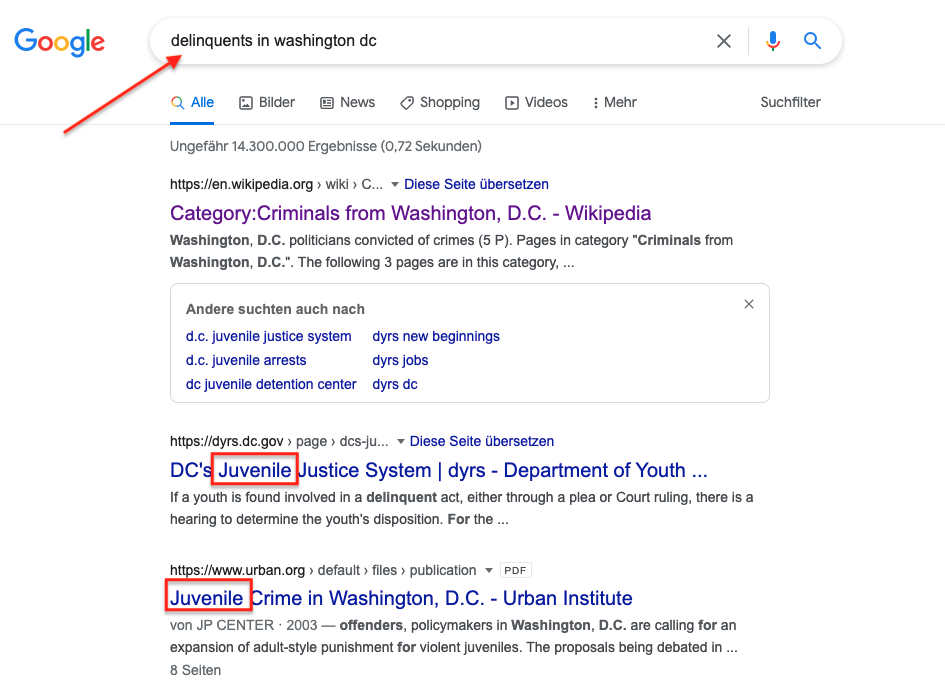

In [29]:
Image(filename='GoogleSearch.png')

<font color=blue size=5><b>Data Exploration take-aways (1)</b></font>

If...

- You are in DC

- During the summer months

- You just had lunch

- And you see this:

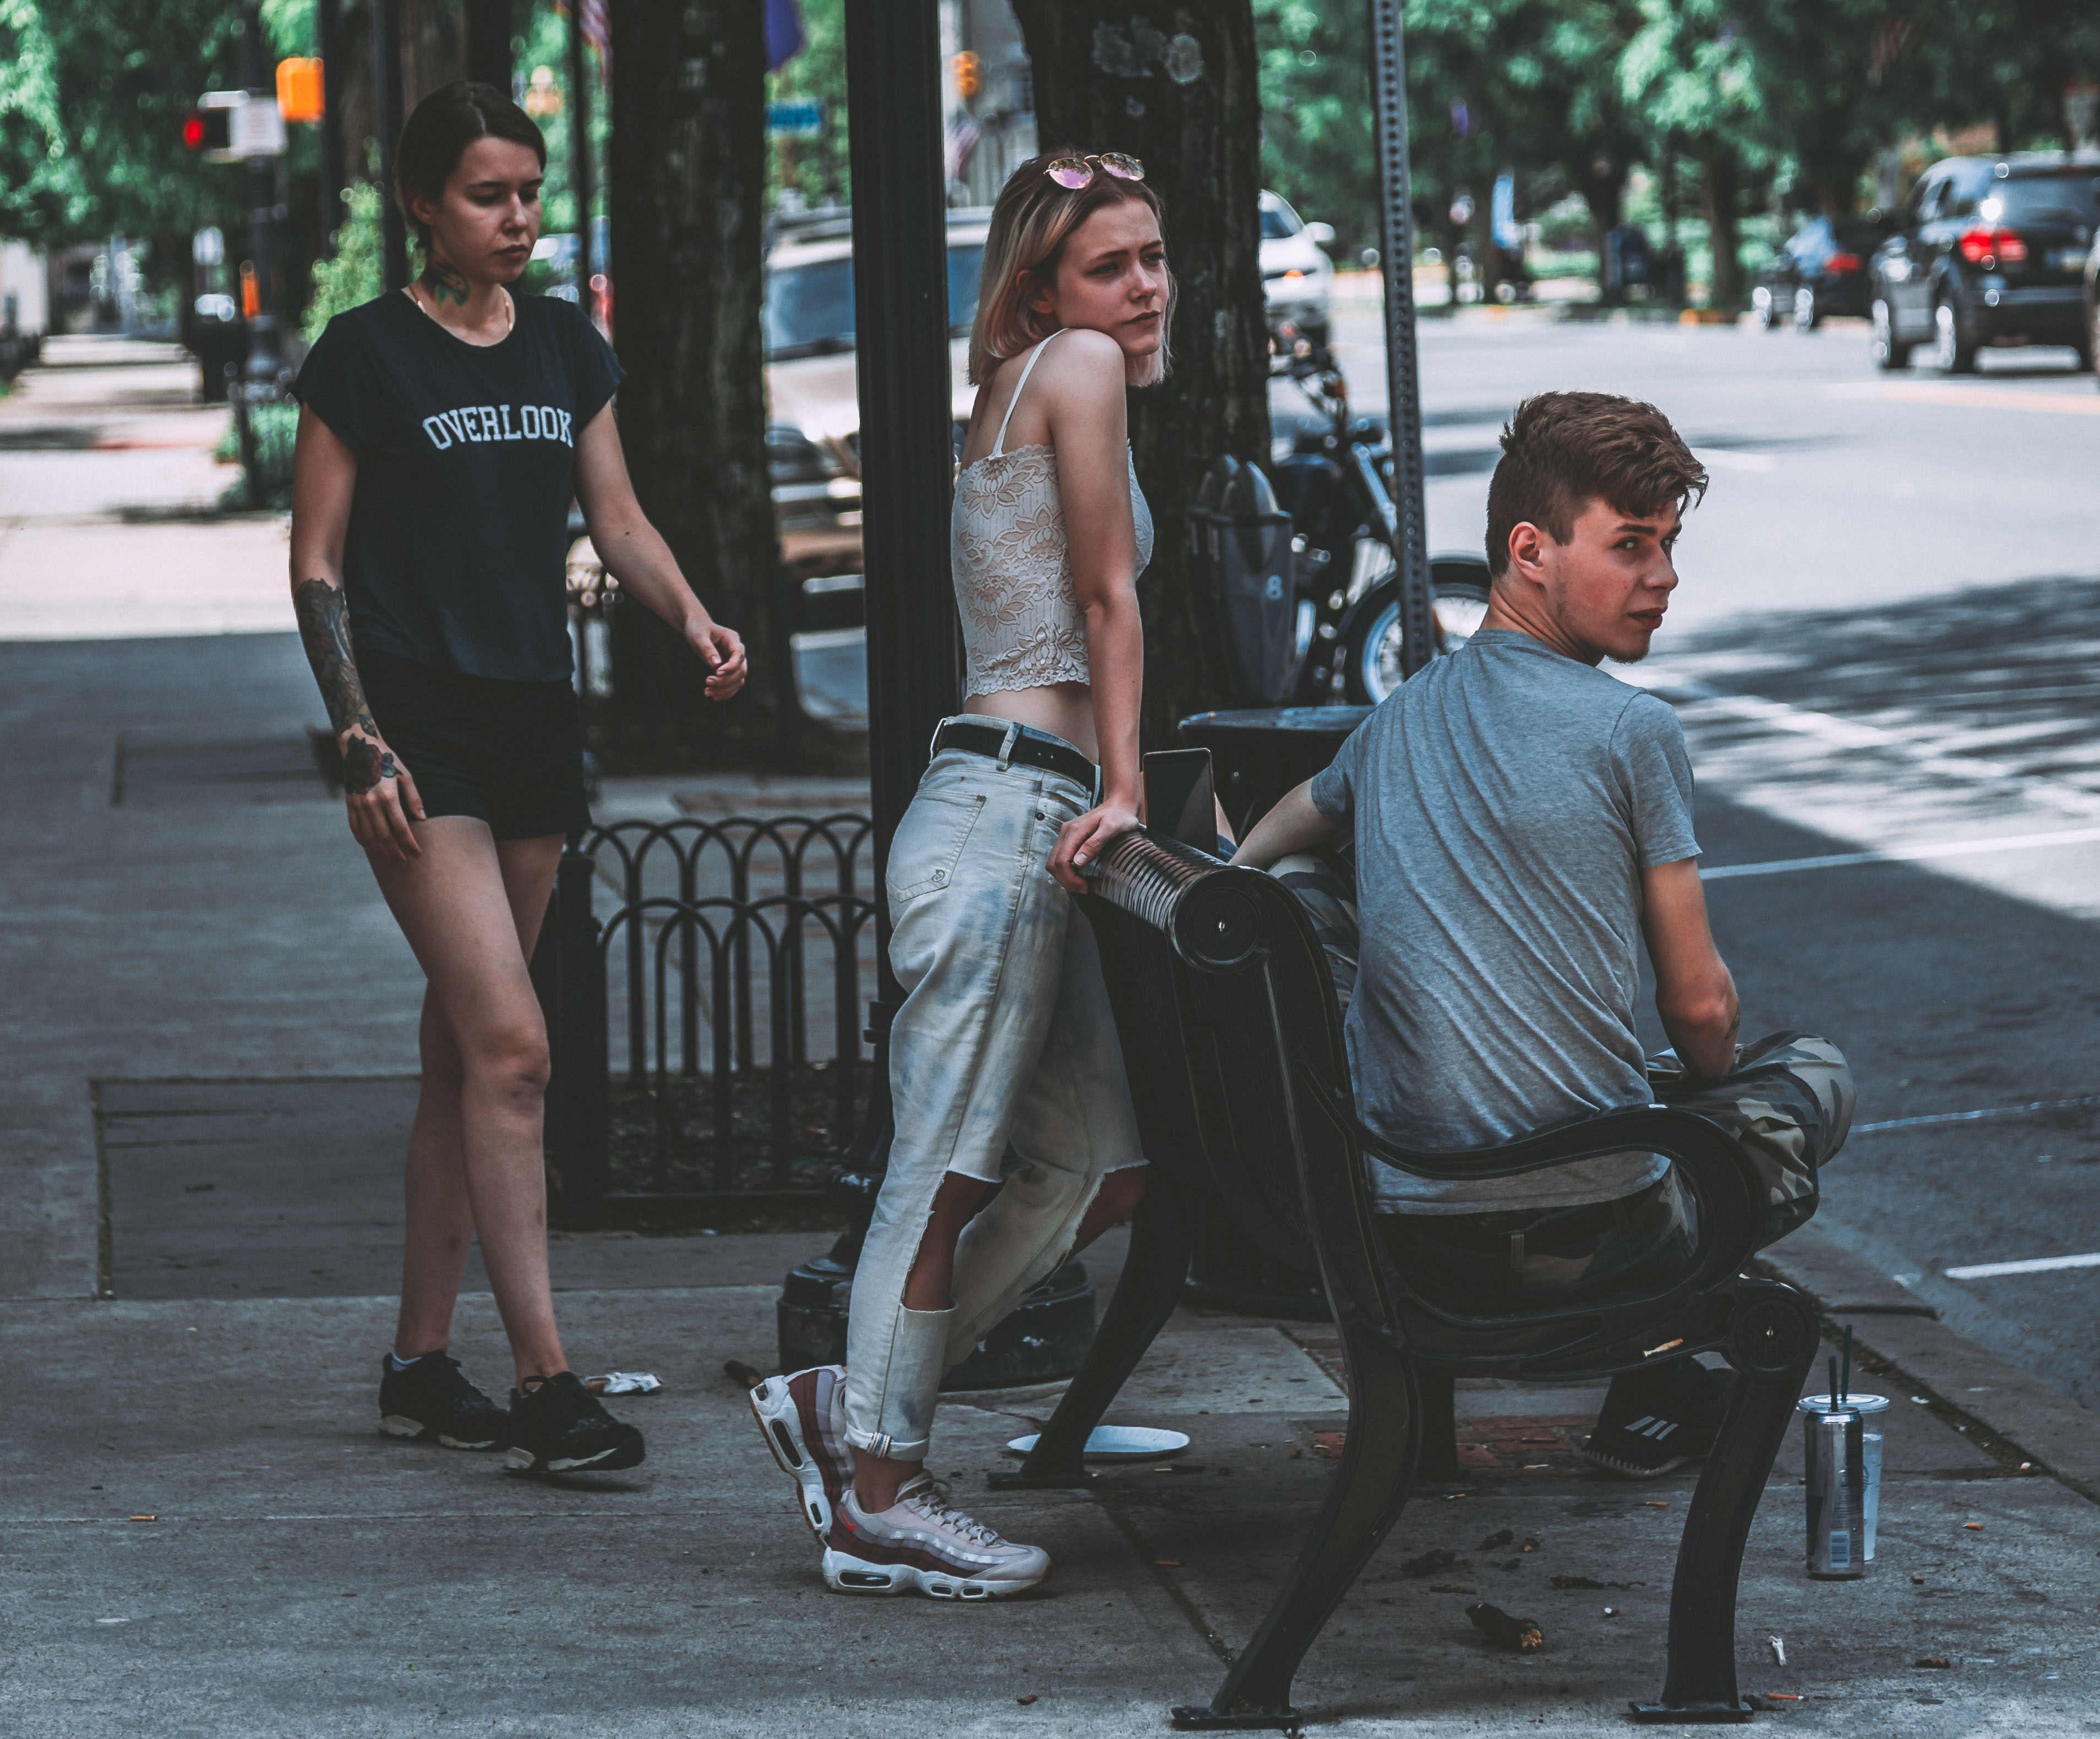

In [30]:
Image(filename='teenagers.jpg')

<font color=pink size=5><center><b>Run !</b></center></font>

<font color=blue size=5><b><top>Data Exploration take-aways (2)</top></b></font>

- Offenders in DC tend to be juvenile

- Which may mean that tradiotional solutions may not work to reduce most common offenses

- => Find specific root causes

    - Work may be needed outside of police stations, for instance:

        - Involve parents

        - Leverage education over repression

In [31]:
(df[df["offender_age"]<14].groupby(["offender_age","OFFENSE_NAME","RELATIONSHIP_NAME"]).count())

INCIDENT_ID  \
offender_age OFFENSE_NAME                             RELATIONSHIP_NAME                         
7.0          Simple Assault                           Victim Was Stranger                   1   
9.0          Robbery                                  Victim Was Stranger                   1   
             Simple Assault                           Victim Was Stranger                   1   
10.0         Aggravated Assault                       Victim Was Stranger                   1   
             Robbery                                  Victim Was Stranger                   4   
             Simple Assault                           Victim Was Stranger                   7   
11.0         Robbery                                  Victim Was Stranger                   2   
             Simple Assault                           Victim Was Stranger                   8   
12.0         Aggravated Assault                       Victim Was Stranger                  15   
             Destruction/Damage/Vandalism of Property Victim Was Stranger                   1   
             Fondling                                 Victim Was Stranger                   1   
             Intimidation                             Victim Was Stranger                   9   
             Purse-snatching                          Victim Was Stranger                   1   
             Robbery                                  Victim Was Acquaintance               2   
                                                      Victim Was Stranger                  33   
                                                      Victim was Otherwise Known            1   
             Simple Assault                           Relationship Unknown                  1   
                                                      Victim Was Acquaintance               6   
                                                      Victim Was Stranger                  51   
                                                      Victim was Otherwise Known            3   
             Stolen Property Offenses                 Victim Was Stranger                   1   
13.0         Aggravated Assault                       Victim Was Stranger                  16   
             All Other Larceny                        Victim Was Stranger                   8   
             Destruction/Damage/Vandalism of Property Victim Was Stranger                   3   
             Fondling                                 Victim Was Stranger                   3   
             Intimidation                             Victim Was Stranger                  11   
             Robbery                                  Relationship Unknown                  4   
                                                      Victim Was Acquaintance              11   
                                                      Victim Was Stranger                  74   
                                                      Victim was Otherwise Known            2   
             Simple Assault                           Relationship Unknown                  1   
                                                      Victim Was Acquaintance              11   
                                                      Victim Was Stranger                 123   
                                                      Victim was Otherwise Known            6   
             Stolen Property Offenses                 Victim Was Stranger                   1   

                                                                                  NIBRS_MONTH_ID  \
offender_age OFFENSE_NAME                             RELATIONSHIP_NAME                            
7.0          Simple Assault                           Victim Was Stranger                      1   
9.0          Robbery                                  Victim Was Stranger                      1   
             Simple Assault                           Victim Was Stranger                   

In [32]:
(df[df["offender_age"]>60].groupby(["offender_age","OFFENSE_NAME","RELATIONSHIP_NAME"]).count())

INCIDENT_ID  \
offender_age OFFENSE_NAME                             RELATIONSHIP_NAME                         
61.0         Kidnapping/Abduction                     Victim Was Stranger                   4   
             Robbery                                  Victim Was Stranger                   4   
             Simple Assault                           Victim Was Stranger                   3   
             Weapon Law Violations                    Victim Was Stranger                   4   
62.0         Destruction/Damage/Vandalism of Property Victim Was Stranger                   1   
             Intimidation                             Victim Was Stranger                   4   
             Simple Assault                           Victim Was Stranger                   3   
64.0         Fondling                                 Victim Was Stranger                   1   
             Intimidation                             Victim Was Stranger                   1   
             Simple Assault                           Victim Was Acquaintance               1   
                                                      Victim Was Offender                   2   
                                                      Victim Was Stranger                   3   
65.0         Intimidation                             Victim Was Acquaintance               1   
             Simple Assault                           Victim Was Stranger                   2   
66.0         Simple Assault                           Victim Was Stranger                   1   
68.0         Fondling                                 Victim Was Stranger                   3   
             Simple Assault                           Victim Was Offender                   2   
                                                      Victim Was Stranger                   4   
                                                      Victim was Otherwise Known            1   
71.0         Simple Assault                           Victim Was Stranger                   1   
72.0         Simple Assault                           Victim Was Stranger                   1   

                                                                                  NIBRS_MONTH_ID  \
offender_age OFFENSE_NAME                             RELATIONSHIP_NAME                            
61.0         Kidnapping/Abduction                     Victim Was Stranger                      4   
             Robbery                                  Victim Was Stranger                      4   
             Simple Assault                           Victim Was Stranger                      3   
             Weapon Law Violations                    Victim Was Stranger                      4   
62.0         Destruction/Damage/Vandalism of Property Victim Was Stranger                      1   
             Intimidation                             Victim Was Stranger                      4   
             Simple Assault                           Victim Was Stranger                      3   
64.0         Fondling                                 Victim Was Stranger                      1   
             Intimidation                             Victim Was Stranger                      1   
             Simple Assault                           Victim Was Acquaintance                  1   
                                                      Victim Was Offender                      2   
                                                      Victim Was Stranger                      3   
65.0         Intimidation                             Victim Was Acquaintance                  1   
             Simple Assault                           Victim Was Stranger                      2   
66.0         Simple Assault                           Victim Was Stranger                      1   
68.0         Fondling                                 Victim Was Stranger                      3   
             Simple Assault                       

In [33]:
(
    offenders_df[["offender_age","OFFENDER_ID","OFFENSE_NAME"]]
    [(offenders_df["offender_age_id"]==5)&(offenders_df["offender_gender"]!="U")]
    .drop_duplicates()    
    .groupby(["offender_age","OFFENSE_NAME"])
    .count()
    .sort_values(by="OFFENDER_ID", ascending=False)
).head(30)

OFFENDER_ID
offender_age OFFENSE_NAME                                         
15.0         Simple Assault                                    217
16.0         Robbery                                           201
             Simple Assault                                    197
14.0         Simple Assault                                    177
15.0         Robbery                                           139
17.0         Robbery                                           121
13.0         Simple Assault                                    101
14.0         Robbery                                            96
17.0         Simple Assault                                     90
18.0         Simple Assault                                     85
             Robbery                                            77
16.0         Purse-snatching                                    76
19.0         Simple Assault                                     60
17.0         Purse-snatching                                    59
15.0         Purse-snatching                                    55
13.0         Robbery                                            54
20.0         Simple Assault                                     54
27.0         Simple Assault                                     51
25.0         Drug/Narcotic Violations                           50
22.0         Drug/Narcotic Violations                           50
14.0         Purse-snatching                                    50
19.0         Robbery                                            49
25.0         Simple Assault                                     48
21.0         Simple Assault                                     48
             Robbery                                            47
22.0         Simple Assault                                     47
12.0         Simple Assault                                     47
16.0         Destruction/Damage/Vandalism of Property           46
27.0         Drug/Narcotic Violations                           45
15.0         Destruction/Damage/Vandalism of Property           43

In [34]:
(offenders_df[["offender_age","OFFENDER_ID"]]
 [(offenders_df["offender_age_id"]==5)]
    .drop_duplicates() 
)[["offender_age"]].describe()

,offender_age
count,4948.000000
mean,23.600647
std,11.552054
min,7.000000
25%,15.000000
50%,19.000000
75%,28.000000
max,72.000000


# Modelling

## DataFrame cleaning

In [35]:
def clean_df_func():
    return (df
 #filters
 [(df["VICTIM_TYPE_NAME"]=="Individual")
 &(df["victim_gender"]!="U")]
 
 #dropping columns with ID numbers and columns out of scope
 .drop(columns=[
     "NIBRS_MONTH_ID",
     "OFFENSE_ID",
     "OFFENSE_TYPE_ID",
     "LOCATION_ID",
     "CRIME_AGAINST",
     "OFFENDER_ID",
     "offender_gender",
     "offender_age_id",
     "offender_age",
     "offender_age_range_low",
     "offender_age_range_high",
     "VICTIM_TYPE_ID",
     "victim_age_id",
     "victim_age_range_low",
     "victim_age_range_high",
     "victim_resident_code",
     "CIRCUMSTANCES_ID",
     "CIRCUMSTANCES_NAME",
     "VICTIM_TYPE_NAME",
     "BIAS_ID",
     "RELATIONSHIP_ID",
     "RELATIONSHIP_NAME",
     "RELATIONSHIP_TYPE_ID",
     "BIAS_CATEGORY",
     "BIAS_DESC",
     "OFFENSE_CATEGORY_NAME"
               ])
 
 #lower case for all
 .rename(columns=str.lower)
 .drop_duplicates()
 
  #dropping last ID columns and columns out of scope
 .drop(columns=[
     "incident_id",
     "victim_id"
                ])
 
 #filling NaN for incident hour column
 .fillna(15.5)
)

clean_df = clean_df_func()
clean_df

,incident_hour,month_num,location_name,offense_name,victim_gender,victim_age
0,20.0,6,Air/Bus/Train Terminal,Purse-snatching,F,30.0
1,19.0,10,Air/Bus/Train Terminal,Robbery,M,13.0
26,14.0,10,Highway/Road/Alley/Street/Sidewalk,Robbery,M,15.0
42,18.0,10,Air/Bus/Train Terminal,Purse-snatching,F,15.0
44,21.0,11,Highway/Road/Alley/Street/Sidewalk,All Other Larceny,M,22.0
...,...,...,...,...,...,...
15781,15.5,12,Parking/Drop Lot/Garage,Destruction/Damage/Vandalism of Property,F,37.0
15782,15.5,12,Parking/Drop Lot/Garage,Destruction/Damage/Vandalism of Property,F,57.0
15783,15.5,12,Parking/Drop Lot/Garage,Theft From Motor Vehicle,M,68.0
15784,15.5,12,Parking/Drop Lot/Garage,Theft From Motor Vehicle,F,37.0


## Data transformation

In [36]:
def ready_x_data_func(already_cleaned_df):
    if "offense_name" in already_cleaned_df.columns:
        location_dummies = pd.get_dummies(already_cleaned_df[["location_name"]])
        gender_dummies = pd.get_dummies(already_cleaned_df[["victim_gender"]], drop_first=True)
        df_minus_dummies = already_cleaned_df.drop(columns=["location_name","offense_name","victim_gender"])
        return pd.concat([location_dummies, gender_dummies, df_minus_dummies], axis=1)
    else:
        location_dummies = pd.get_dummies(already_cleaned_df[["location_name"]])
        gender_dummies = pd.get_dummies(already_cleaned_df[["victim_gender"]], drop_first=True)
        df_minus_dummies = already_cleaned_df.drop(columns=["location_name","victim_gender"])
        return pd.concat([location_dummies, gender_dummies, df_minus_dummies], axis=1)

In [37]:
clean_df

,incident_hour,month_num,location_name,offense_name,victim_gender,victim_age
0,20.0,6,Air/Bus/Train Terminal,Purse-snatching,F,30.0
1,19.0,10,Air/Bus/Train Terminal,Robbery,M,13.0
26,14.0,10,Highway/Road/Alley/Street/Sidewalk,Robbery,M,15.0
42,18.0,10,Air/Bus/Train Terminal,Purse-snatching,F,15.0
44,21.0,11,Highway/Road/Alley/Street/Sidewalk,All Other Larceny,M,22.0
...,...,...,...,...,...,...
15781,15.5,12,Parking/Drop Lot/Garage,Destruction/Damage/Vandalism of Property,F,37.0
15782,15.5,12,Parking/Drop Lot/Garage,Destruction/Damage/Vandalism of Property,F,57.0
15783,15.5,12,Parking/Drop Lot/Garage,Theft From Motor Vehicle,M,68.0
15784,15.5,12,Parking/Drop Lot/Garage,Theft From Motor Vehicle,F,37.0


In [38]:
clean_df[clean_df["offense_name"]=="Aggravated Assault"]["month_num"].value_counts()

6     19
5     18
2     15
7     14
1     14
10    14
9     13
11    12
12    12
8     11
3      8
4      7
Name: month_num, dtype: int64

## X and y definition

In [39]:
X = ready_x_data_func(clean_df)
X

,location_name_Air/Bus/Train Terminal,location_name_Commercial/Office Building,location_name_Highway/Road/Alley/Street/Sidewalk,location_name_Industrial Site,location_name_Other/Unknown,location_name_Park/Playground,location_name_Parking/Drop Lot/Garage,victim_gender_M,incident_hour,month_num,victim_age
0,1,0,0,0,0,0,0,0,20.0,6,30.0
1,1,0,0,0,0,0,0,1,19.0,10,13.0
26,0,0,1,0,0,0,0,1,14.0,10,15.0
42,1,0,0,0,0,0,0,0,18.0,10,15.0
44,0,0,1,0,0,0,0,1,21.0,11,22.0
...,...,...,...,...,...,...,...,...,...,...,...
15781,0,0,0,0,0,0,1,0,15.5,12,37.0
15782,0,0,0,0,0,0,1,0,15.5,12,57.0
15783,0,0,0,0,0,0,1,1,15.5,12,68.0
15784,0,0,0,0,0,0,1,0,15.5,12,37.0


In [40]:
X.columns

Index(['location_name_Air/Bus/Train Terminal',
       'location_name_Commercial/Office Building',
       'location_name_Highway/Road/Alley/Street/Sidewalk',
       'location_name_Industrial Site', 'location_name_Other/Unknown',
       'location_name_Park/Playground',
       'location_name_Parking/Drop Lot/Garage', 'victim_gender_M',
       'incident_hour', 'month_num', 'victim_age'],
      dtype='object')

In [41]:
X

,location_name_Air/Bus/Train Terminal,location_name_Commercial/Office Building,location_name_Highway/Road/Alley/Street/Sidewalk,location_name_Industrial Site,location_name_Other/Unknown,location_name_Park/Playground,location_name_Parking/Drop Lot/Garage,victim_gender_M,incident_hour,month_num,victim_age
0,1,0,0,0,0,0,0,0,20.0,6,30.0
1,1,0,0,0,0,0,0,1,19.0,10,13.0
26,0,0,1,0,0,0,0,1,14.0,10,15.0
42,1,0,0,0,0,0,0,0,18.0,10,15.0
44,0,0,1,0,0,0,0,1,21.0,11,22.0
...,...,...,...,...,...,...,...,...,...,...,...
15781,0,0,0,0,0,0,1,0,15.5,12,37.0
15782,0,0,0,0,0,0,1,0,15.5,12,57.0
15783,0,0,0,0,0,0,1,1,15.5,12,68.0
15784,0,0,0,0,0,0,1,0,15.5,12,37.0


<font color=blue size=5><b><center>Modelling</center></b></font>

jupyter nbconvert Exploratory_Data_Analysis_notebook.ipynb --to slides --post serve --no-input